In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

np.random.seed(35)

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, '9')

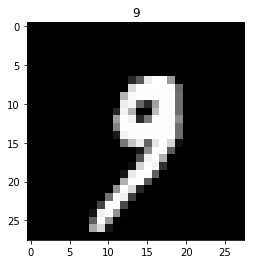

In [5]:
plt.imshow(X_test[1000], cmap='gray')
plt.title(y_test[1000])

In [0]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255 

In [8]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[1000], Y_train[1000]

(0, array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [9]:
model = Sequential()

model.add(Dense(512, input_dim=784))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
#model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
size = int(len(X_train) * 0.8)

train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]

In [15]:
hist = model.fit(train_x, train_y, batch_size=128, nb_epoch=5, validation_data=(val_x, val_y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 2816/48000 [>.............................] - ETA: 2s - loss: 0.0234 - acc: 0.9925

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


48000/48000 [==============================] - 3s 62us/step - loss: 0.0259 - acc: 0.9918 - val_loss: 0.0873 - val_acc: 0.9773
Epoch 2/5
48000/48000 [==============================] - 3s 63us/step - loss: 0.0246 - acc: 0.9922 - val_loss: 0.1073 - val_acc: 0.9737
Epoch 3/5
48000/48000 [==============================] - 3s 62us/step - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0976 - val_acc: 0.9756
Epoch 4/5
48000/48000 [==============================] - 3s 63us/step - loss: 0.0213 - acc: 0.9929 - val_loss: 0.0958 - val_acc: 0.9788
Epoch 5/5
48000/48000 [==============================] - 3s 63us/step - loss: 0.0174 - acc: 0.9945 - val_loss: 0.1048 - val_acc: 0.9738


In [13]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 1s 55us/step

Test accuracy:  0.974


In [0]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('output.csv', index=False)

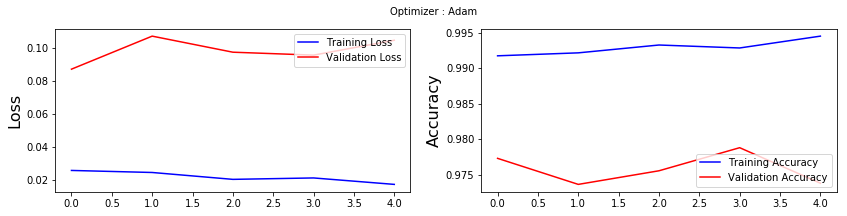

In [16]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()